## Observations

Scatter and line charts at the end of this document show two clear correlations. Firstly, a snapshot of mouse S185 shows Capomulin to be an effective treatment in at least one case, with tumour volume steadily decreasing over time. This aligns with Capomulin showing a significantly lower mean final volume compared to many other treatments.

Gender balance was kepy suitably close to a perfectly even split, so there should be no gender bias to these results.

Tumour volume is closely correlated to weight - where assessing treatment effectiveness, further analysis should be done considering tumour volumes as a fraction of weight may be a better comparison point, or there should at least be some consideration of average weight for each experimental group.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
df  = pd.merge(mouse_metadata,study_results, on = 'Mouse ID')
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Checking number of mice
cnt = df["Mouse ID"].count()
print(f"Number of mice in DF is {cnt}")

Number of mice in DF is 1893


In [3]:
#Mouse ID and Timepoint for duplicated mice
dupes = pd.DataFrame()
dupes["Mouse ID"] = df.loc[df["Mouse ID"].duplicated(),"Mouse ID"]
dupes["Timepoint"] = df.loc[df["Mouse ID"].duplicated(),"Timepoint"]

In [4]:
#Bonus: All data for duplicated entries.
dupes_full = df.loc[df["Mouse ID"].duplicated(),:]

In [5]:
# Clean DF By Drupping Duplicates
df_clean = df.drop_duplicates(subset = ["Mouse ID"], keep = 'last')


In [6]:
cnt = df_clean["Mouse ID"].count()
print(f"Number of mice in cleaned DF is {cnt}")

Number of mice in cleaned DF is 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

grp_df = df_clean.groupby(by = "Drug Regimen")
summary_df = pd.DataFrame()
summary_df["mean"] = grp_df["Tumour Volume (mm3)"].mean()
summary_df["median"] = grp_df["Tumour Volume (mm3)"].median()
summary_df["variance"] = grp_df["Tumour Volume (mm3)"].var()
summary_df["standard deviation"] = grp_df["Tumour Volume (mm3)"].std()
summary_df["SEM"] = grp_df["Tumour Volume (mm3)"].sem()
summary_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = grp_df["Tumour Volume (mm3)"].agg(func = ["mean","median","var","std","sem"])

agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

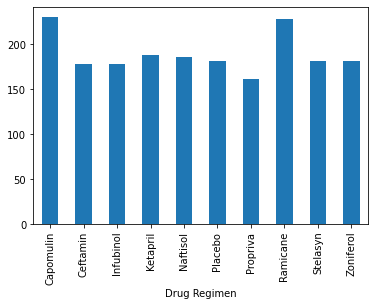

In [9]:
plt_df = pd.DataFrame()
plt_df = df.groupby("Drug Regimen")["Mouse ID"].count()
plot = plt_df.plot.bar(x = "Drug Regimen")

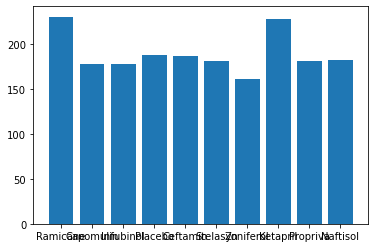

In [10]:
plt_mpl = plt.bar(df["Drug Regimen"].unique(),plt_df[:])

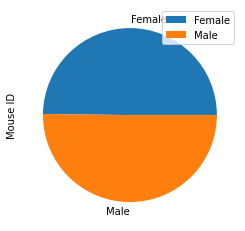

In [11]:
grp_df = df_clean.groupby("Sex")
plt_df = grp_df.count()
plt_df.plot.pie(y = "Mouse ID")

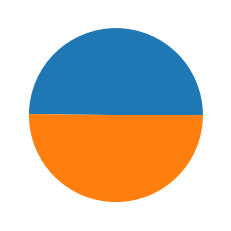

In [12]:
plot = plt.pie(plt_df["Mouse ID"])

## Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = df.groupby(by = "Mouse ID",as_index="False")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
end_df = max_timepoints.to_frame().merge(df,how = 'left',on=["Mouse ID","Timepoint"])
end_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]
outliers_df = pd.DataFrame()
# Create empty list to fill with tumour vol data (for plotting)
tvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i, treatment in enumerate(treatments):
    # Locate the rows which contain mice on each drug and get the tumour volumes
    filtered_df = end_df.loc[end_df["Drug Regimen"] == treatment,:]
    # add subset 
    tvol.append(filtered_df["Tumour Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    iqr = st.iqr(tvol[i])
    print(iqr)
    upper = st.scoreatpercentile(tvol[i],75) + (1.5*iqr)
    lower = st.scoreatpercentile(tvol[i],25) - (1.5*iqr)
    out_ref = (end_df["Drug Regimen"] == treatment) & (
        (end_df["Tumour Volume (mm3)"].astype(float) > upper) |
        (end_df["Tumour Volume (mm3)"].astype(float) < lower))
    outliers_df = outliers_df.append(end_df.loc[out_ref,:])
    
outliers_df

7.781863460000004
9.098536719999998
11.477135160000003
15.577752179999997


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


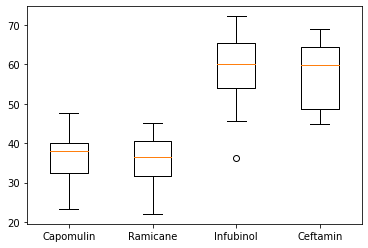

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

plot = plt.boxplot(tvol,
                  labels = treatments)

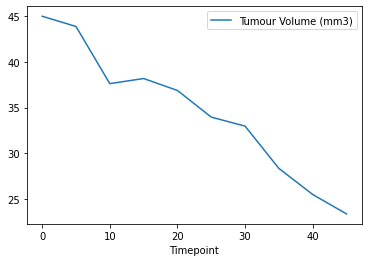

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

#Taking mouse ID = s185
single_mouse_df = df.loc[df["Mouse ID"] == "s185"]
single_mouse_df.plot.line(x = "Timepoint", y = "Tumour Volume (mm3)")


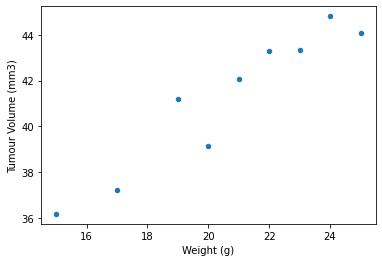

In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
scatter_df = df.loc[df["Drug Regimen"] == "Capomulin"]
grp = scatter_df.groupby("Weight (g)")
average_vol = pd.DataFrame()
average_vol["Tumour Volume (mm3)"] = grp["Tumour Volume (mm3)"].mean()
average_vol["Weight (g)"] = grp["Tumour Volume (mm3)"].mean().index
average_vol.plot.scatter(x = "Weight (g)", y = "Tumour Volume (mm3)")

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

slope, intercept, r, p, stderr = st.linregress(average_vol)
print(f"Equation from linear regression is Tumour = {round(slope,2)}*Weight + {round(intercept,2)}")
print(f"Correlation coefficient is {r}")

Equation from linear regression is Tumour = 1.01*Weight + -20.99
Correlation coefficient is 0.950524396185527
